In [2]:
import pandas as pd
import texthero as hero

In [3]:
folder = "../data/mgp_data/"
publication = pd.read_pickle(folder+"final_mathscinet_publs_processed.pkl")

In [ ]:
#titles = publication["title"].values.tolist()

In [6]:
publication.columns

Index(['author_id', 'title', 'authors', 'msc_code', 'item_type',
       'journal_name', 'publication_year', 'clean_title'],
      dtype='object')

In [4]:
publication["clean_title"] = hero.clean(publication["title"])

In [5]:
publication["clean_title"].sample(5).values

array(['invasion percolation poisson weighted infinite tree',
       'precise threshold quasi ramsey numbers', 'groups measures nip',
       'hypersymmetric abelian varieties',
       'basis independence implicitly defined hamiltonian circuit dynamics'],
      dtype=object)

In [7]:
publication = publication.sample(10000)

In [8]:
publication['tfidf'] = hero.tfidf(publication['clean_title'], max_features=1000)

In [9]:
publication['pca'] = (
            publication['tfidf']
            .pipe(hero.pca)
   )

In [19]:
#hero.scatterplot(publication, col='pca', color='ptype', title="publication title")

In [10]:
#sample = publication.sample(1000)

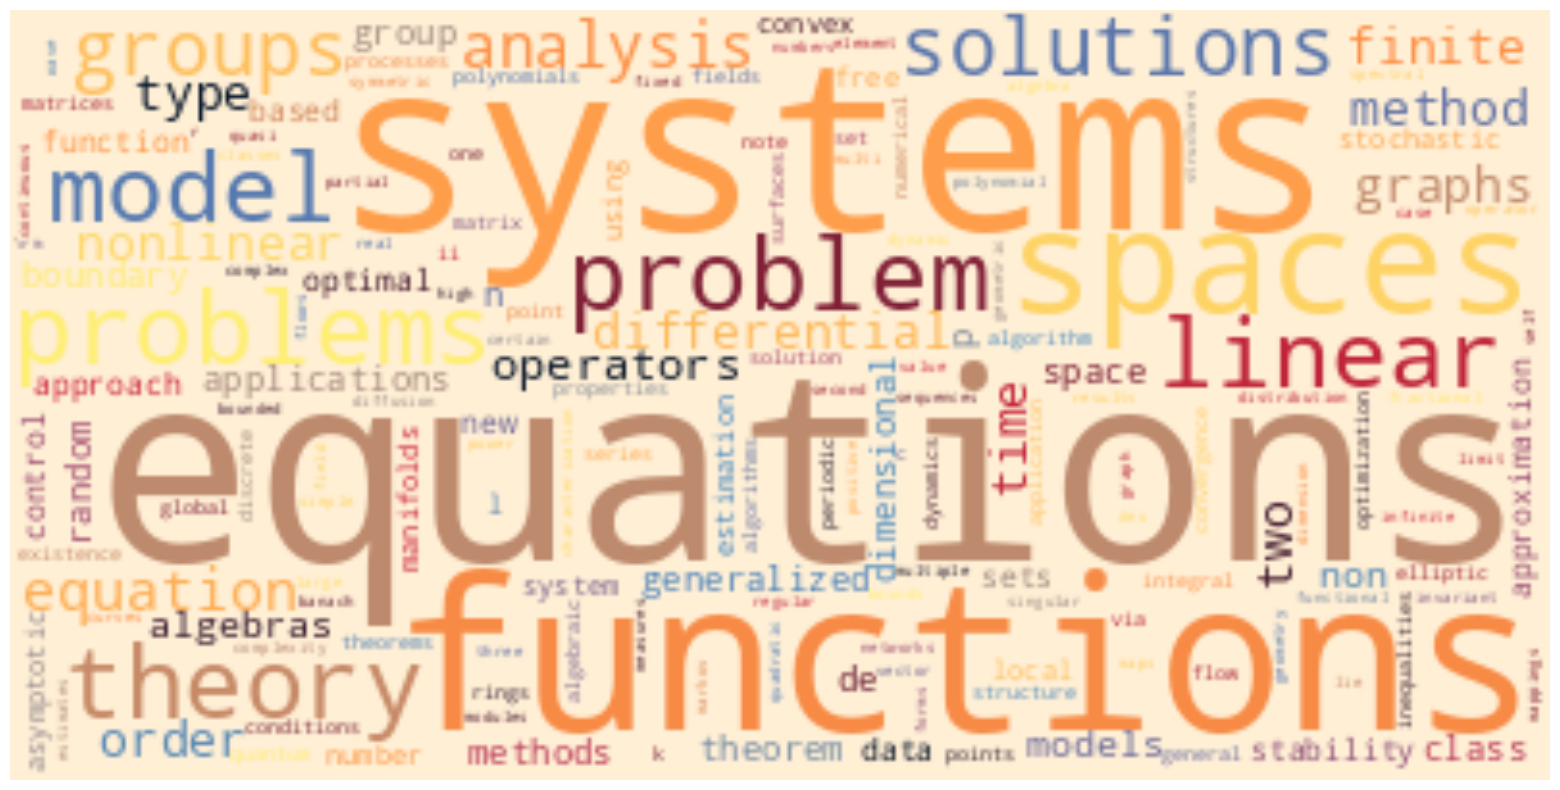

In [14]:
hero.wordcloud(publication["clean_title"])

In [12]:
hero.scatterplot(publication, col='pca', color='journal_name', title="publication title")